## Problem Set 02B Procesado de Imágenes

## EJECUTA ESTA CELDA PARA AUTENTICARTE CON TU CUENTA DE GMAIL

In [11]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

CLICK ON THIS LINK TO AUTHENTICATE WITH YOUR GMAIL ACCOUNT
https://accounts.google.com/o/oauth2/auth?scope=profile+email&redirect_uri=http%3A%2F%2Flocalhost%3A8080&response_type=code&client_id=486275613361-7nk9ktukfcfjevfoe3tamjp0pmbjmprs.apps.googleusercontent.com&access_type=offline
waiting for authentication ...
authentication succeeded


ServerNotFoundError: Unable to find the server at accounts.google.com

## Ejercicio 1 

Completa la función `convolution` para que dada una matriz $A \in \mathbb{R}^{m_1\times n_1}$ y un filtro $f \in \mathbb{R}^{m_2 \times n_2}$ devuelva una matriz $C \in \mathbb{R}^{m \times n}$ con $m=m_1 - m_2 + 1$ y $n = n_1 - n_2 + 1$

Al hacer la convolución, el filtro $f$ se desplaza sobre la matriz $A$ y por cada parche $p$ de sobre el que se superpone el pixel $C_j$ correspondiente de $C$ se calcula por:

$$ C_j = \sum_i p_i f_i $$

es decir, multiplicando $p$ y $f$ elemento a elemento y sumando los resultados.


#### Ejemplo de ejecución

    A = np.array([[1,2,1,2,1,2],
                  [2,3,2,3,2,3],
                  [4,3,4,3,4,3],
                  [6,4,6,4,6,4],
                  [7,5,7,5,7,5]])
                  
    f = np.array([[2,2,2],
                  [2,2,2]])

    > convolution(A, f)

#### Resultado esperado

    [[ 22.  26.  22.  26.]
     [ 36.  36.  36.  36.]
     [ 54.  48.  54.  48.]
     [ 70.  62.  70.  62.]]
 

In [3]:
import numpy as np

def convolution(A, f):
    from scipy.signal import convolve2d
    result = convolve2d(A, f, mode="valid")
    return result

import urllib, inspect
src1 = urllib.quote_plus(inspect.getsource(convolution))

In [4]:
# -- VERIFICA TU CODIGO --
A = np.array([[1,2,1,2,1,2],[2,3,2,3,2,3],[4,3,4,3,4,3],[6,4,6,4,6,4],[7,5,7,5,7,5]])
f = np.array([[2,2,2],[2,2,2]])
print convolution(A,f)

[[22 26 22 26]
 [36 36 36 36]
 [54 48 54 48]
 [70 62 70 62]]


#### evaluate your answer before submitting:

In [5]:
!./run CHECK_SOLUTION PS4_1 $src1

evaluation result CORRECT


#### submit your answer (you must be connected to internet)

In [12]:
!./run SUBMIT_SOLUTION PS4_1 $src1

connecting ... session expired, please run the first cell to authenticate with your google account again
user not authenticated, please run the first cell of this notebook to authenticate


puedes ver también cómo funciona tu código con una imagen y un filtro concreto. El resultado debería de mostrar los bordes verticales de la imagen original

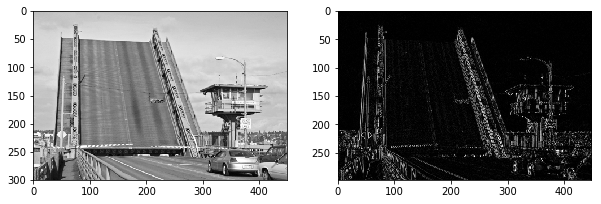

In [13]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

img = io.imread("../imgs/puente.jpg")
gimg = np.mean(img, axis=2)


f = np.array([[0, 0, 0],
              [0,-1, 1],
              [0, 0, 0]])

bimg = convolution(gimg, f)

fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)

plt.imshow(gimg, cmap = plt.cm.Greys_r)
fig.add_subplot(122)

plt.imshow(np.abs(bimg), cmap = plt.cm.Greys_r);


##  Ejercicio 2

Completa la función siguiente para que:

1. Cargue el fichero `data/mnist1.5k.csv` con las imágenes de MNIST como en el problem set anterior
- Le aplique a cada imagen un filtro de 6x6 unos (todos los elementos con el valor 1)      
- devuelva:
   - una matriz `df`, en la que cada linea contiene la imagen de la linea correspondiente de MNIST pero con el filtro anterior aplicado con convolución.
   - un vector `c` con las clases a las que pertenece cada imagen.
   
Observa que cada imagen original es de 28x28, pero al aplicarle el filtro anterior quedan de 23x23, por lo que `df` $\in \mathbb{R}^{1500x529}$

Usa el método [`reshape`](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.reshape.html) para construir una imagen de 28x28 desde la original antes de aplicarle la convolución y para construir un vector de 529 elementos con la imagen de 23x23 resultante de la convolución.

Aplica el método de convolución anterior tal cual, no normalizes los valores de intensidad de las imágenes.

In [51]:
import pandas as pd
from scipy.signal import convolve2d
import numpy as np
d = pd.read_csv("../data/mnist1.5k.csv.gz", header=None).values.astype(float)
x=d[:,1:785]
y=d[:,0]
f=np.array([[1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1]])
c=[]
for i in range(x.shape[0]):
    A = x[i].reshape(28,28)
    result = convolve2d(A, f, mode="valid")
    c = result.reshape(529) 

IndexError: list assignment index out of range

In [ ]:
def mnist_blurred():
    import pandas as pd
    # escribe tu código
    return 

    
import urllib, inspect
src2 = urllib.quote_plus(inspect.getsource(mnist_blurred)+"\n"+inspect.getsource(convolution))

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS4_2 $src2

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS4_2 $src2

#### fíjate en el efecto que tiene la convolución con ese filtro en MNIST

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%run -i ../code/show_mnist.py
df,c = mnist_blurred()
show_sample_mnist(df,c)

##  Ejercicio 3

Completa la función siguiente para que:

1. Cargue el fichero MNIST transformado según el ejercicio anterior
- Entrene un `GuassianNB` con los primeros 1000 elementos
- Devuelva el model `GaussianNB` entrenado

Puedes verificar tu código añadiendo celdas adicionales y obteniendo el score con los datos de entrenamiento (los primeros 1000) y con los datos de test (los últimos 500). Para los datos de entrenamiento el score debería de ser 0.705 y para los de test debería de ser 0.710

In [ ]:
import numpy as np
def build_gaussian():
    from sklearn.naive_bayes import GaussianNB
    # escribe tu código
    return

import urllib, inspect
src3 = urllib.quote_plus(inspect.getsource(mnist_blurred)+"\n"+
                         inspect.getsource(convolution)+"\n"+
                         inspect.getsource(build_gaussian))

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS4_3 $src3

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS4_3 $src3